# Demonstração de regressão

### Carregando o dataset e realizando procedimentos iniciais

In [1]:
!python3 -m pip install -r ../requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('../data/Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
dataset.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [16]:
X=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']

# Regressão linear simples

In [17]:
#Usando o statsmodels
import statsmodels.api as sm

radio = sm.add_constant(X['Radio']) 

model_radio = sm.OLS(y, radio).fit()

model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           4.35e-19
Time:                        20:24:48   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
tv = sm.add_constant(X['TV']) 
model_tv = sm.OLS(y, tv).fit()
model_tv.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           1.47e-42
Time:                        20:24:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
Newspaper = sm.add_constant(X['Newspaper']) 
model_news = sm.OLS(y, Newspaper).fit()
model_news.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00115
Time:                        20:24:48   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste com o Sklearn

In [20]:
from sklearn import linear_model

regr_tv = linear_model.LinearRegression()

X_tv = np.array(X['TV']).reshape((-1, 1))

regr_tv.fit(X_tv, y)

r_sq = regr_tv.score(X_tv, y)

print('R2:', r_sq)

print('Intercept:', regr_tv.intercept_)

print('Slope:', regr_tv.coef_) 


R2: 0.611875050850071
Intercept: 7.032593549127695
Slope: [0.04753664]


### Predição de valores

In [21]:
### Prevendo as vendas com investimento em TV de 500 e 10000

print(regr_tv.predict([[500]]))
print(regr_tv.predict([[10000]]))

[30.80091377]
[482.39899788]


## Avaliando predição

Coeficiente: [0.04707932]
Mean squared error: 9.84
R2 (ou coeficiente de determinação): 0.70


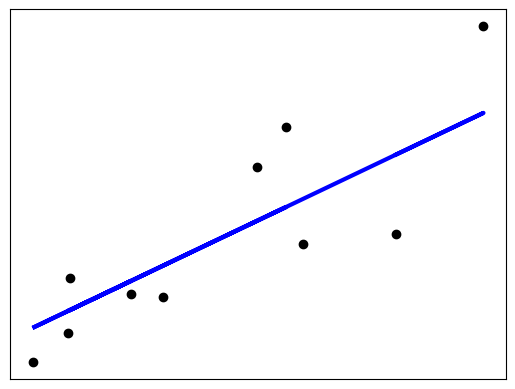

In [22]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score


# Divide as features em treino e teste
X_tv_train = X_tv[:-10]
X_tv_test = X_tv[-10:]


# Separa os alvos em treino e teste 
y_train = y[:-10]
y_test = y[-10:]

# Cria um objeto de regressão linear 
regr_tv = linear_model.LinearRegression()

# Treina o modelo usando o conjunto de treino
regr_tv.fit(X_tv_train, y_train)

# Faz predições usando o conjunto de teste 
y_pred = regr_tv.predict(X_tv_test)

# Coeficientes
print("Coeficiente:", regr_tv.coef_)

# Mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# O coeficiente de determinação (ou R2)
print("R2 (ou coeficiente de determinação): %.2f" % r2_score(y_test, y_pred))

# Plot
plt.scatter(X_tv_test, y_test, color="black")
plt.plot(X_tv_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
    